In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END

## Reduces
from typing import Annotated
from langgraph.graph.message import add_messages


In [2]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")


In [8]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")


AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BgDKwz3SOf7noqmYJBRkL9iy7D8vr', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--b59c61c0-ef66-408a-8d27-40adf1688ce1-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [3]:
from langchain_groq import ChatGroq
groq=ChatGroq(model="qwen-qwq-32b")
groq.invoke("Hello")


AIMessage(content='\n<think>\nOkay, the user wrote "Hello". I need to respond politely and offer help. Let me think of a friendly greeting.\n\nMaybe start with "Hello!" to be warm. Then ask how I can assist them today. Keep it open-ended so they can ask anything. Maybe add an emoji to keep it friendly. Let me check for typos. Yep, that looks good. Send!\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 92, 'prompt_tokens': 11, 'total_tokens': 103, 'completion_time': 0.2131181, 'prompt_time': 0.002899175, 'queue_time': 0.257874445, 'total_time': 0.216017275}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_a91d9c2cfb', 'finish_reason': 'stop', 'logprobs': None}, id='run--8656581d-f34d-425c-af05-d3ee50b38794-0', usage_metadata={'input_tokens': 11, 'output_tokens': 92, 'total_tokens': 103})

In [4]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [5]:
def chatbot(state: State):
    return {"messages": [groq.invoke(state["messages"])]}


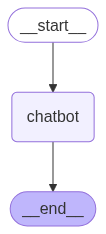

In [6]:
from IPython.display import Image
graph = StateGraph(State)
graph.add_node(
    "chatbot",
    chatbot
)

graph.add_edge(START,"chatbot")
graph.add_edge("chatbot",END)

graph_builder = graph.compile()
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [8]:
graph_builder.invoke({"messages": [{"role": "user", "content": "Hi Iam Jaya,Iam really interested in Cybersecurity"}]})


{'messages': [HumanMessage(content='Hi Iam Jaya,Iam really interested in Cybersecurity', additional_kwargs={}, response_metadata={}, id='484ea3b6-4b31-416d-8db3-4b04eb9ab175'),
  AIMessage(content='\n<think>\nOkay, so the user is Jaya, and they\'re really interested in Cybersecurity. Let me start by welcoming them and acknowledging their interest. I should make sure to keep the tone friendly and encouraging. \n\nFirst, I need to outline the key areas in Cybersecurity. Let me think, the main branches are like Network Security, Information Security, Cloud Security, etc. Maybe list a few of those and explain them briefly. \n\nThen, they might need resources to get started. Suggesting online courses is a good idea. Platforms like Coursera, Udemy, or freeCodeCamp come to mind. Mentioning specific certifications like CompTIA Security+, CEH, CISSP would be helpful, but maybe note that some are entry-level and others require experience. \n\nPractical skills are important too. Tools like Wiresh

In [14]:
## Streaming the responses
## stream_mode="values" will return all the responses from the chatbot , "updates will return the latest message from the chatbot

for event in graph_builder.stream({"messages": "Hi Iam Jaya,Iam really interested in Cybersecurity"},stream_mode="updates"):
    print(event)

{'chatbot': {'messages': [AIMessage(content='\n<think>\nOkay, so the user is Jaya, and they\'re really into cybersecurity. Let me think about how to respond. First, I should welcome them and express enthusiasm. Then, maybe ask about their background? Are they a student, someone starting a career, or just a hobbyist? Knowing that could help tailor the advice.\n\nI should mention some key areas in cybersecurity to give them an overview. Maybe topics like networking, cryptography, ethical hacking, and security frameworks. Suggesting learning resources would be helpful—like online courses, books, or certifications. Certifications like CompTIA Security+, CEH, or CISSP come to mind, but maybe start with the entry-level ones first.\n\nAlso, practical experience is important. Maybe recommend trying out tools like Wireshark, Metasploit, or setting up a lab environment. Open-source tools could be a good start. Encouraging participation in CTFs (Capture The Flag) events would be useful for hands-